##  Analysis of Antimicrobial Resistance Mutations in *M. abscessus*

Full publication name: Comparison of Antimicrobial Resistance Mutations and in vitro Susceptibility in *Mycobacterium abscessus* Isolates from People with Cystic Fibrosis

## 1) Loading Datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Isolate Level Dataset
# Colleciton dates were previously sorted
df = pd.read_excel('MAB_MIC_DR_mutations_DCC.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Isolate             225 non-null    object
 1   Sample_ASID         225 non-null    object
 2   Patient_ASID        225 non-null    object
 3   WGS_Identification  225 non-null    object
 4   State               225 non-null    object
 5   MIC_AMK             225 non-null    object
 6   MIC_CLR             225 non-null    object
 7   MIC_CLR_14          45 non-null     object
 8   16S_1463772         225 non-null    object
 9   23S_1466477         225 non-null    object
 10  23S_1466478         225 non-null    object
 11  erm_T28C_2345982    225 non-null    object
 12  Clone               225 non-null    object
dtypes: object(13)
memory usage: 23.0+ KB


## 2) Data Wrangling

### 2.1) Setting MIC values as categories 

In [3]:
amk_sorted = ['≤8.0', '16', '32', '64', '>64']
df['MIC_AMK'] = pd.Categorical(df['MIC_AMK'], categories=amk_sorted)
df['MIC_AMK'].value_counts().sort_index()

≤8.0    104
16       84
32       10
64        0
>64      27
Name: MIC_AMK, dtype: int64

In [4]:
df['MIC_AMK'].unique()

['≤8.0', '16', '>64', '32']
Categories (5, object): ['≤8.0', '16', '32', '64', '>64']

In [5]:
df['MIC_CLR'].unique()

array(['≤0.25', '0.5', '1', '4', '2', '>32', '8', '16'], dtype=object)

In [6]:
clr_sorted = ['≤0.25', '0.5', '1', '2', '4', '8', '16', '>32']
df['MIC_CLR'] = pd.Categorical(df['MIC_CLR'], categories=clr_sorted)
df['MIC_CLR'].value_counts().sort_index()

≤0.25    88
0.5      35
1        35
2        32
4        19
8         1
16        1
>32      14
Name: MIC_CLR, dtype: int64

### 2.2) Adding CLSI interpretations for rapidly growing mycobacteria (M62 1st edition)

In [7]:
amk_int = {'≤8.0': 'S', '16': 'S', '>64': 'R', '32': 'I'}
int_sorted = ['S', 'I', 'R']
df['AMK_int'] = df['MIC_AMK'].apply(amk_int.get)
df['AMK_int'] = pd.Categorical(df['AMK_int'], categories=int_sorted)
df['AMK_int'].value_counts().sort_index()

S    188
I     10
R     27
Name: AMK_int, dtype: int64

In [8]:
clr_int = {'≤0.25': 'S', '0.5': 'S', '1': 'S', 
           '4': 'I', '2': 'S', '32':'R', '>32': 'R', '8': 'R', '16': 'R'}
df['CLR_int'] = df['MIC_CLR'].apply(clr_int.get)
df['CLR_int'] = pd.Categorical(df['CLR_int'], categories=int_sorted)
df['CLR_int'].value_counts().sort_index()

S    190
I     19
R     16
Name: CLR_int, dtype: int64

In [9]:
df['MIC_CLR_14'].unique()

array([nan, '16', '≤0.25', '>32', '32'], dtype=object)

In [10]:
df['CLR_14_int'] = df['MIC_CLR_14'].apply(clr_int.get)
df['CLR_14_int'] = pd.Categorical(df['CLR_14_int'], categories=int_sorted)
df['CLR_14_int'].value_counts().sort_index()

S    13
I     0
R    32
Name: CLR_14_int, dtype: int64

### 2.3) Renaming gene columns 

In [11]:
df.columns

Index(['Isolate', 'Sample_ASID', 'Patient_ASID', 'WGS_Identification', 'State',
       'MIC_AMK', 'MIC_CLR', 'MIC_CLR_14', '16S_1463772', '23S_1466477',
       '23S_1466478', 'erm_T28C_2345982', 'Clone', 'AMK_int', 'CLR_int',
       'CLR_14_int'],
      dtype='object')

In [12]:
df.rename({'16S_1463772': 'rrs_1408', 
           '23S_1466477': 'rrl_2058',
           '23S_1466478': 'rrl_2059',
           'erm_T28C_2345982': 'erm41_28'},
          axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Isolate             225 non-null    object  
 1   Sample_ASID         225 non-null    object  
 2   Patient_ASID        225 non-null    object  
 3   WGS_Identification  225 non-null    object  
 4   State               225 non-null    object  
 5   MIC_AMK             225 non-null    category
 6   MIC_CLR             225 non-null    category
 7   MIC_CLR_14          45 non-null     object  
 8   rrs_1408            225 non-null    object  
 9   rrl_2058            225 non-null    object  
 10  rrl_2059            225 non-null    object  
 11  erm41_28            225 non-null    object  
 12  Clone               225 non-null    object  
 13  AMK_int             225 non-null    category
 14  CLR_int             225 non-null    category
 15  CLR_14_int          45 non-null     cate

### 2.4) Setting predicitons for genotypes

In [13]:
df['rrs_1408'].value_counts()

A    198
G     27
Name: rrs_1408, dtype: int64

In [14]:
rrs_pred = {'A': 'Not resistant', 
            'G': 'Resistant'}
df['rrs_prediction'] = df['rrs_1408'].apply(rrs_pred.get)
df['rrs_prediction'].value_counts()

Not resistant    198
Resistant         27
Name: rrs_prediction, dtype: int64

In [15]:
df['rrl_2058_2059'] = df['rrl_2058'] + df['rrl_2059']
df['rrl_2058_2059']

0      AA
1      AA
2      AA
3      AA
4      AA
       ..
220    AA
221    AA
222    AA
223    AA
224    AA
Name: rrl_2058_2059, Length: 225, dtype: object

In [16]:
rrl_pred = {'AA': 'Not resistant', 
            'CA': 'Resistant',
            'GA': 'Resistant', 
            'AC': 'Resistant'}
df['rrl_prediction'] = df['rrl_2058_2059'].apply(rrl_pred.get)
df['rrl_prediction'].value_counts()

Not resistant    214
Resistant         11
Name: rrl_prediction, dtype: int64

In [17]:
df['erm41_28'].value_counts()

T            174
truncated     31
C             20
Name: erm41_28, dtype: int64

In [18]:
erm_pred = {'C': 'Not resistant',
            'truncated': 'Not resistant',
            'T': 'Resistant'}
df['erm_prediction'] = df['erm41_28'].apply(erm_pred.get)
df['erm_prediction'].value_counts()

Resistant        174
Not resistant     51
Name: erm_prediction, dtype: int64

In [20]:
# Exporting clean dataset
df.to_excel('MAB_dataset_clean.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Isolate             225 non-null    object  
 1   Sample_ASID         225 non-null    object  
 2   Patient_ASID        225 non-null    object  
 3   WGS_Identification  225 non-null    object  
 4   State               225 non-null    object  
 5   MIC_AMK             225 non-null    category
 6   MIC_CLR             225 non-null    category
 7   MIC_CLR_14          45 non-null     object  
 8   rrs_1408            225 non-null    object  
 9   rrl_2058            225 non-null    object  
 10  rrl_2059            225 non-null    object  
 11  erm41_28            225 non-null    object  
 12  Clone               225 non-null    object  
 13  AMK_int             225 non-null    category
 14  CLR_int             225 non-null    category
 15  CLR_14_int          45 non-null     cate

## 3) Sample Level Analysis

In [20]:
# Percentage of isolates with resistance in both rrl and rrs: 
count_rrs_rrl = 0 
for i, row in df.iterrows():
    if (row['rrs_1408'] != 'A' and (row['rrl_2058_2059'] != 'AA')):
        print(row['Isolate'])
        count_rrs_rrl += 1
print(count_rrs_rrl/225)

CF00287-00614.MAB
CF01039-01210.MAB
0.008888888888888889


In [21]:
# Percentage of isolates with resistance in all genes: 
count_rrs_rrl_erm = 0 
for i, row in df.iterrows():
    if (row['rrs_1408'] != "A" and 
        row['rrl_2058_2059'] != 'AA' and 
        row['erm41_28'] != 'C'):
        print(row['Isolate'])
        count_rrs_rrl_erm += 1
print(count_rrs_rrl_erm/225)

CF00287-00614.MAB
CF01039-01210.MAB
0.008888888888888889


### 3.1) Comparison between Phenotype and Genotype

In [22]:
import matplotlib.pyplot as plt

In [23]:
amk_rrs = df.groupby(['MIC_AMK', 'rrs_1408'])['WGS_Identification'].value_counts().unstack()
amk_rrs.columns.name = None
amk_rrs.reset_index(inplace=True)
amk_rrs.fillna(0, inplace=True)
amk_rrs

,MIC_AMK,rrs_1408,MAB,MBOL,MMAS
0,≤8.0,A,91.0,2.0,11.0
1,16,A,64.0,1.0,19.0
2,32,A,9.0,0.0,1.0
3,>64,G,25.0,2.0,0.0


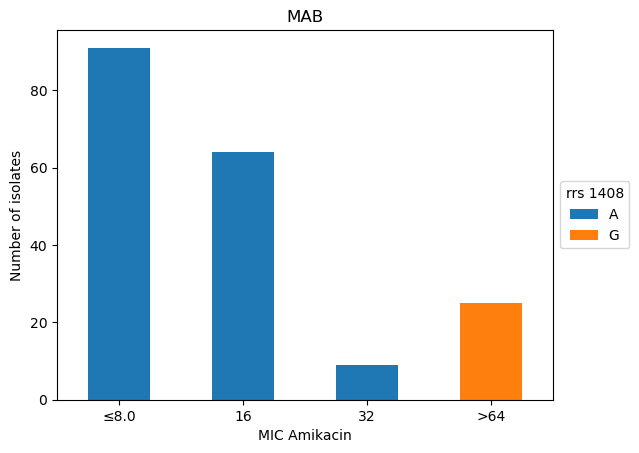

In [24]:
# Figure 1a

mab_rrs = amk_rrs.pivot(index="MIC_AMK", columns="rrs_1408", values="MAB")
mab_rrs.fillna(0, inplace=True)
mab_rrs.sort_index(inplace=True)
mab_rrs.index.name = "MIC Amikacin"

fig_1a = mab_rrs.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.title(label="MAB")
plt.ylabel(ylabel="Number of isolates")
plt.legend(title="rrs 1408", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

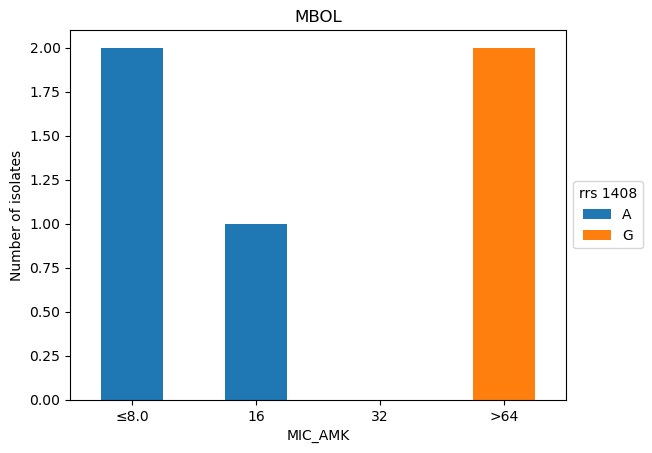

In [25]:
# Figure 1b

mbol_rrs = amk_rrs.pivot(index="MIC_AMK", columns="rrs_1408", values="MBOL")
mbol_rrs.fillna(0, inplace=True)
mbol_rrs.sort_index(inplace=True)
mbol_rrs.index.name = "MIC_AMK"

fig_1b = mbol_rrs.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.title(label="MBOL")
plt.ylabel(ylabel="Number of isolates")
plt.legend(title="rrs 1408", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

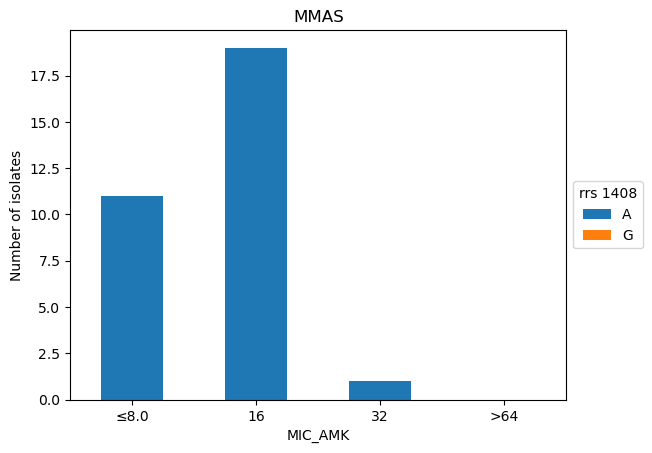

In [26]:
# Figure 1c
mmas_rrs = amk_rrs.pivot(index="MIC_AMK", columns="rrs_1408", values="MMAS")
mmas_rrs.fillna(0, inplace=True)
mmas_rrs.sort_index(inplace=True)
mmas_rrs.index.name = "MIC_AMK"

fig_1c = mmas_rrs.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.title(label="MMAS")
plt.ylabel(ylabel="Number of isolates")
plt.legend(title="rrs 1408", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
clr_rrl = df.groupby(['MIC_CLR', 'rrl_2058_2059'])['WGS_Identification'].value_counts().unstack()
clr_rrl.columns.name = None
clr_rrl.reset_index(inplace=True)
clr_rrl.fillna(0, inplace=True)
clr_rrl

,MIC_CLR,rrl_2058_2059,MAB,MBOL,MMAS
0,≤0.25,AA,60.0,3.0,25.0
1,0.5,AA,32.0,1.0,2.0
2,1,AA,31.0,1.0,3.0
3,2,AA,32.0,0.0,0.0
4,4,AA,19.0,0.0,0.0
5,8,AA,1.0,0.0,0.0
6,16,AA,1.0,0.0,0.0
7,>32,AA,3.0,0.0,0.0
8,>32,AC,1.0,0.0,0.0
9,>32,CA,7.0,0.0,1.0


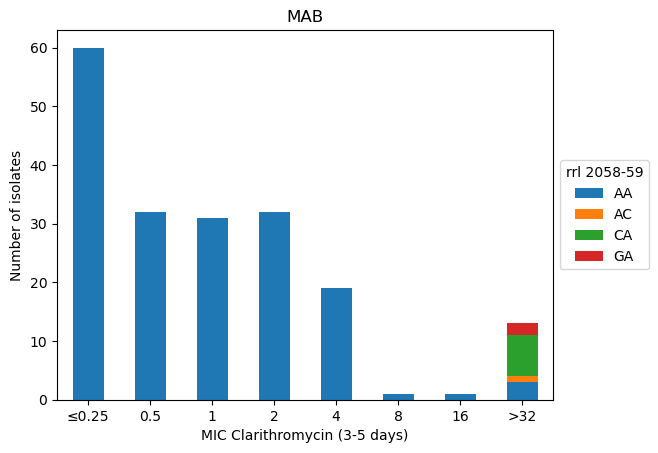

In [28]:
# Figure 1d
mab_rrl = clr_rrl.pivot(index="MIC_CLR", columns="rrl_2058_2059", values="MAB")
mab_rrl.fillna(0, inplace=True)
mab_rrl.sort_index(inplace=True)
mab_rrl.index.name = "MIC Clarithromycin (3-5 days)"

mab_rrl.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.title(label="MAB")
plt.ylabel(ylabel="Number of isolates")
plt.legend(title="rrl 2058-59", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

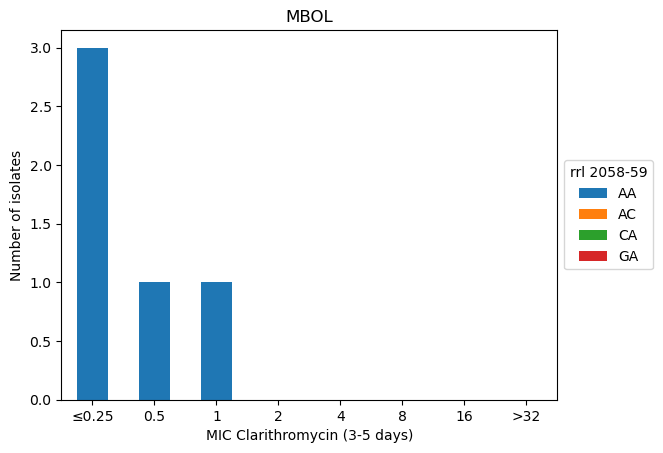

In [29]:
# Figure 1e
mab_rrl = clr_rrl.pivot(index="MIC_CLR", columns="rrl_2058_2059", values="MBOL")
mab_rrl.fillna(0, inplace=True)
mab_rrl.sort_index(inplace=True)
mab_rrl.index.name = "MIC Clarithromycin (3-5 days)"

mab_rrl.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.title(label="MBOL")
plt.ylabel(ylabel="Number of isolates")
plt.legend(title="rrl 2058-59", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

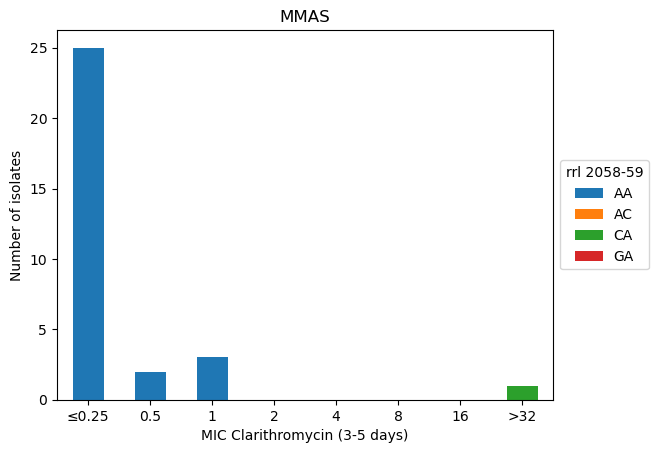

In [30]:
# Figure 1f
mab_rrl = clr_rrl.pivot(index="MIC_CLR", columns="rrl_2058_2059", values="MMAS")
mab_rrl.fillna(0, inplace=True)
mab_rrl.sort_index(inplace=True)
mab_rrl.index.name = "MIC Clarithromycin (3-5 days)"

mab_rrl.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.title(label="MMAS")
plt.ylabel(ylabel="Number of isolates")
plt.legend(title="rrl 2058-59", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 4) Longitudinal Analysis

### 4.1) Isolates per patient

In [31]:
one_iso = 0
two_or_more_iso = 0

for count in df['Patient_ASID'].value_counts().values:
    if count == 1: 
         one_iso += 1
    elif count >= 2:
        two_or_more_iso += 1


print(f'Patients with 1 isolate: {one_iso}')
print(f'Patients with >= 2 isolates: {two_or_more_iso}')

Patients with 1 isolate: 70
Patients with >= 2 isolates: 45


### 4.2) Subspecies per patient

In [32]:
two_or_more_subsp = 0

for patient, count in df['Patient_ASID'].value_counts().items():
    if count > 1: 
        if df[df['Patient_ASID'] == patient]['WGS_Identification'].nunique() > 1: 
            print(patient)
            print(df[df['Patient_ASID'] == patient]['WGS_Identification'].value_counts())
            print('')  
            two_or_more_subsp += 1  
            
print(f'Number of patients with longitudinal variation in subspecies: {two_or_more_subsp}')

CF00198
MAB     2
MMAS    1
Name: WGS_Identification, dtype: int64

CF00154
MMAS    2
MAB     1
Name: WGS_Identification, dtype: int64

CF00077
MAB     1
MMAS    1
Name: WGS_Identification, dtype: int64

Number of patients with longitudinal variation in subspecies: 3


### 4.3) Variation in rrs position 1408

In [33]:
rrs_snps = 0

for patient, count in df["Patient_ASID"].value_counts().items():
    if count > 1: 
        if df[df["Patient_ASID"] == patient]["rrs_1408"].nunique() > 1: 
            print(patient)
            print(df[df["Patient_ASID"] == patient]["rrs_1408"].value_counts())
            print("")  
            rrs_snps += 1  
            
print(f"Number of patients with longitudinal variation in rrs position 1408: {rrs_snps}")

CF00138
A    4
G    1
Name: rrs_1408, dtype: int64

CF00088
A    2
G    1
Name: rrs_1408, dtype: int64

Number of patients with longitudinal variation in rrs position 1408: 2


### 4.4) Variation in rrl positions 2058 and 2059

In [34]:
rrl_snps = 0

for patient, count in df["Patient_ASID"].value_counts().items():
    if count > 1: 
        if df[df["Patient_ASID"] == patient]['rrl_2058_2059'].nunique() > 1: 
            print(patient)
            print(df[df["Patient_ASID"] == patient]["rrl_2058_2059"].value_counts())
            print("")  
            rrl_snps += 1  
            
print(f"Number of patients with longitudinal variation in rrl position 2058-59: {rrl_snps}")

CF00158
AA    2
CA    2
Name: rrl_2058_2059, dtype: int64

Number of patients with longitudinal variation in rrl position 2058-59: 1


### 4.5) Variation in erm(41) position 28

In [35]:
erm_snps = 0

for patient, count in df["Patient_ASID"].value_counts().items():
    if count > 1: 
        if df[df["Patient_ASID"] == patient]["erm41_28"].nunique() > 1: 
            print(patient)
            print(df[df["Patient_ASID"] == patient]["erm41_28"].value_counts())
            print("")  
            erm_snps += 1  
            
print(f"Number of patients with longitudinal variation in erm(41) position 28: {erm_snps}")

CF00016
T    7
C    2
Name: erm41_28, dtype: int64

CF00198
C            2
truncated    1
Name: erm41_28, dtype: int64

CF00154
truncated    2
T            1
Name: erm41_28, dtype: int64

CF00077
T            1
truncated    1
Name: erm41_28, dtype: int64

Number of patients with longitudinal variation in erm(41) position 28: 4


### 4.6) Confusion matrices for phenotype and genotype
- Precision = TP / TP + FP
- Accuracy = TP + TN / Total
- Sensitivity = TP / TP + FN
- Specificity = TN / TN + FP

Removal of intermediate interpretation was done to remove potential 2-fold dilution errors that make qualitative classifications uncertain

Sensitivity and Specificity will be calculated using the epiR package (see "Analysis_DR_mutations_MAB.html")

In [36]:
# rrs confusion matrix 
rrs_matrix = df.groupby(['rrs_prediction'])['AMK_int'].value_counts().unstack()
rrs_matrix.drop(columns='I', inplace=True)
rrs_matrix = rrs_matrix.reindex(['Resistant', 'Not resistant'], axis=0)
rrs_matrix = rrs_matrix.reindex(['R', 'S'], axis=1)
rrs_matrix.rename({'Resistant': 'True', 'Not resistant': 'False'}, axis=0, inplace=True)
rrs_matrix.rename({'R': 'True', 'S': 'False'}, axis=1, inplace=True)
rrs_matrix.index.name = 'rrs resistance'
rrs_matrix.columns.name='AMK resistance'
rrs_matrix.to_csv('rrs_confusion_matrix.csv')
rrs_matrix

AMK resistance,True,False
rrs resistance,,
True,27,0
False,0,188


In [37]:
# rrl confusion matrix 
rrl_matrix = df.groupby(['rrl_prediction'])['CLR_int'].value_counts().unstack()
rrl_matrix.drop(columns='I', inplace=True)
rrl_matrix = rrl_matrix.reindex(['Resistant', 'Not resistant'], axis=0)
rrl_matrix = rrl_matrix.reindex(['R', 'S'], axis=1)
rrl_matrix.rename({'Resistant': 'True', 'Not resistant': 'False'}, axis=0, inplace=True)
rrl_matrix.rename({'R': 'True', 'S': 'False'}, axis=1, inplace=True)
rrl_matrix.index.name = 'rrl resistance'
rrl_matrix.columns.name='CLR 3-5 days resistance'
rrl_matrix.to_csv('rrl_confusion_matrix.csv')
rrl_matrix

CLR 3-5 days resistance,True,False
rrl resistance,,
True,11,0
False,5,190


In [38]:
# erm confusion matrix (only for non MMAS isolates with rrl_2058_2059 == 'AA')
subsp_rrl_filter = (df['WGS_Identification'] != 'MMAS') & (df['rrl_2058_2059'] == 'AA')
erm_matrix = df[subsp_rrl_filter].groupby(['erm_prediction'])['CLR_14_int'].value_counts().unstack()
erm_matrix.drop(columns='I', inplace=True)
erm_matrix = erm_matrix.reindex(['Resistant', 'Not resistant'], axis=0)
erm_matrix = erm_matrix.reindex(['R', 'S'], axis=1)
erm_matrix.rename({'Resistant': 'True', 'Not resistant': 'False'}, axis=0, inplace=True)
erm_matrix.rename({'R': 'True', 'S': 'False'}, axis=1, inplace=True)
erm_matrix.index.name = 'erm resistance'
erm_matrix.columns.name='CLR 14 days resistance'
erm_matrix.to_csv('erm_confusion_matrix.csv')
erm_matrix

CLR 14 days resistance,True,False
erm resistance,,
True,28,0
False,0,12


## 5) Patient Level Analysis

In [39]:
# Patient Level Dataset 
# Only contains the first collection date from each patient
df_unique_pt = df.drop_duplicates(subset='Patient_ASID')
df_unique_pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 224
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Isolate             115 non-null    object  
 1   Sample_ASID         115 non-null    object  
 2   Patient_ASID        115 non-null    object  
 3   WGS_Identification  115 non-null    object  
 4   State               115 non-null    object  
 5   MIC_AMK             115 non-null    category
 6   MIC_CLR             115 non-null    category
 7   MIC_CLR_14          24 non-null     object  
 8   rrs_1408            115 non-null    object  
 9   rrl_2058            115 non-null    object  
 10  rrl_2059            115 non-null    object  
 11  erm41_28            115 non-null    object  
 12  Clone               115 non-null    object  
 13  AMK_int             115 non-null    category
 14  CLR_int             115 non-null    category
 15  CLR_14_int          24 non-null     cate

### 5.1) Phenotipic summary

In [40]:
amk = df_unique_pt.groupby(['MIC_AMK', 'AMK_int'])['WGS_Identification'].value_counts().unstack()
amk.reset_index(inplace=True)
amk.columns.name = None
amk.rename({'MIC_AMK': 'MIC', 
            'AMK_int': 'Interpretation'}, 
           axis=1, inplace=True)
amk.index = ['Amikacin'] * amk.shape[0]
amk.index.name = 'Drug'
amk.fillna(0, inplace=True)
amk

,MIC,Interpretation,MAB,MBOL,MMAS
Drug,,,,,
Amikacin,≤8.0,S,45.0,1.0,7.0
Amikacin,16,S,32.0,1.0,15.0
Amikacin,32,I,3.0,0.0,1.0
Amikacin,>64,R,9.0,1.0,0.0


In [41]:
clr = df_unique_pt.groupby(['MIC_CLR', 'CLR_int'])['WGS_Identification'].value_counts().unstack()
clr.reset_index(inplace=True)
clr.columns.name = None
clr.rename({'MIC_CLR': 'MIC', 
            'CLR_int': 'Interpretation'}, 
           axis=1, inplace=True)
clr.index = ['Clarithromycin'] * clr.shape[0]
clr.index.name = 'Drug'
clr.fillna(0, inplace=True)
clr

,MIC,Interpretation,MAB,MBOL,MMAS
Drug,,,,,
Clarithromycin,≤0.25,S,32.0,1.0,19.0
Clarithromycin,0.5,S,13.0,1.0,1.0
Clarithromycin,1,S,15.0,1.0,2.0
Clarithromycin,2,S,13.0,0.0,0.0
Clarithromycin,4,I,9.0,0.0,0.0
Clarithromycin,>32,R,7.0,0.0,1.0


In [42]:
table_1 = pd.concat([amk, clr])

for organism in table_1.columns[2:]:
    org_count = df["WGS_Identification"].value_counts()[organism]
    table_1.rename({organism: organism + f' n={int(org_count)}'}, 
                   axis=1, inplace=True)
    
table_1

,MIC,Interpretation,MAB n=189,MBOL n=5,MMAS n=31
Drug,,,,,
Amikacin,≤8.0,S,45.0,1.0,7.0
Amikacin,16,S,32.0,1.0,15.0
Amikacin,32,I,3.0,0.0,1.0
Amikacin,>64,R,9.0,1.0,0.0
Clarithromycin,≤0.25,S,32.0,1.0,19.0
Clarithromycin,0.5,S,13.0,1.0,1.0
Clarithromycin,1,S,15.0,1.0,2.0
Clarithromycin,2,S,13.0,0.0,0.0
Clarithromycin,4,I,9.0,0.0,0.0


### 5.2) Genotypic summary

In [43]:
rrs = df_unique_pt.groupby(['rrs_1408', 'rrs_prediction'])['WGS_Identification'].value_counts().unstack()
rrs.columns.name = None
rrs.reset_index(inplace=True), 
rrs.rename({'rrs_prediction': 'Prediction', 
            'rrs_1408': 'Genotype'}, axis=1, inplace=True)
rrs.fillna(0, inplace=True)
rrs.index = ['rrs_1408'] * rrs.shape[0]
rrs.index.name = 'Gene_Position'
rrs

,Genotype,Prediction,MAB,MBOL,MMAS
Gene_Position,,,,,
rrs_1408,A,Not resistant,80.0,2.0,23.0
rrs_1408,G,Resistant,9.0,1.0,0.0


In [44]:
rrl = df_unique_pt.groupby(['rrl_2058_2059', 'rrl_prediction'])['WGS_Identification'].value_counts().unstack()
rrl.columns.name = None
rrl.reset_index(inplace=True), 
rrl.rename({'rrl_prediction': 'Prediction', 
            'rrl_2058_2059': 'Genotype'}, axis=1, inplace=True)
rrl.fillna(0, inplace=True)
rrl.index = ['rrl_2058_2059'] * rrl.shape[0]
rrl.index.name = 'Gene_Position'
rrl

,Genotype,Prediction,MAB,MBOL,MMAS
Gene_Position,,,,,
rrl_2058_2059,AA,Not resistant,83.0,3.0,22.0
rrl_2058_2059,AC,Resistant,1.0,0.0,0.0
rrl_2058_2059,CA,Resistant,3.0,0.0,1.0
rrl_2058_2059,GA,Resistant,2.0,0.0,0.0


In [45]:
table_2 = pd.concat([rrs, rrl])

for organism in table_2.columns[2:]:
    org_count = df["WGS_Identification"].value_counts()[organism]
    table_2.rename({organism: organism + f' n={int(org_count)}'}, 
                   axis=1, inplace=True)

table_2

,Genotype,Prediction,MAB n=189,MBOL n=5,MMAS n=31
Gene_Position,,,,,
rrs_1408,A,Not resistant,80.0,2.0,23.0
rrs_1408,G,Resistant,9.0,1.0,0.0
rrl_2058_2059,AA,Not resistant,83.0,3.0,22.0
rrl_2058_2059,AC,Resistant,1.0,0.0,0.0
rrl_2058_2059,CA,Resistant,3.0,0.0,1.0
rrl_2058_2059,GA,Resistant,2.0,0.0,0.0


In [46]:
subsp_filter = df_unique_pt['WGS_Identification'] != 'MMAS'
table3 = df_unique_pt[subsp_filter].groupby(['rrl_2058_2059', 'erm41_28'])
table3 = table3['WGS_Identification'].value_counts().unstack()
table3.reset_index(inplace=True)
table3.fillna(0, inplace=True)
table3.columns.name = None
table3

,rrl_2058_2059,erm41_28,MAB,MBOL
0,AA,C,6.0,0.0
1,AA,T,77.0,3.0
2,AC,C,1.0,0.0
3,CA,C,1.0,0.0
4,CA,T,2.0,0.0
5,GA,T,2.0,0.0


### 5.3) Dominant clone analysis
Research question: Is the frequency of antimicrobial resistance genotypes different in dominant circulating clones (DCC) of *M. abscessus* ?

- Null hypothesis (H0): There's no difference in drug resistance between DCC and non-DCC.
- Alternative hypothesis (H1): 'There's difference in drug resistance between DCC and non-DCC.

A phylogenetic tree was labeled using ggtree and additional statistical analyses were also done using R:
- See 'Analysis_DR_mutations_MAB.html'

In [47]:
from scipy.stats import fisher_exact

In [48]:
def get_fisher_summary(fisher, sig):
    print(fisher.pvalue)
    if fisher.pvalue < sig:
        print('Reject H0')
    else: print('Fail to reject H0')
        
# Testing get_fisher_summary()
fisher1 = fisher_exact([[40, 4], [2, 30]])
get_fisher_summary(fisher1, 0.05)
print('')
fisher2 = fisher_exact([[30, 20], [29, 19]])
get_fisher_summary(fisher2, 0.05)

1.4906417276255767e-14
Reject H0

1.0
Fail to reject H0


In [49]:
# Classifying Dominant Clones in M. abscessus subsp. abscessus
df_pt_mab = df_unique_pt[df_unique_pt['WGS_Identification'] == 'MAB'].copy()
clone_dict = {'MAB.clone001': 'DCC', 
              'MAB.clone002': 'DCC'}
df_pt_mab['Clone'] = df_pt_mab['Clone'].apply(lambda x: clone_dict.get(x, 'Non-DCC'))
df_pt_mab['Clone'].value_counts()

DCC        54
Non-DCC    35
Name: Clone, dtype: int64

#### rrs drug resistance genotypes 

In [56]:
rrs_cont_table = df_pt_mab.groupby(['Clone'])['rrs_prediction'].value_counts().unstack()
rrs_cont_table = rrs_cont_table.reindex(['Resistant', 'Not resistant'], axis=1)
fisher_rrs = fisher_exact(rrs_cont_table, alternative='two-sided')
get_fisher_summary(fisher_rrs, 0.05)
rrs_cont_table

0.08290797261085056
Fail to reject H0


rrs_prediction,Resistant,Not resistant
Clone,,
DCC,8,46
Non-DCC,1,34


#### rrl drug resistance genotypes

In [51]:
rrl_cont_table = df_pt_mab.groupby(['Clone'])['rrl_prediction'].value_counts().unstack()
rrl_cont_table = rrl_cont_table.reindex(['Resistant', 'Not resistant'], axis=1)
fisher_rrl = fisher_exact(rrl_cont_table, alternative='two-sided')
get_fisher_summary(fisher_rrl, 0.05)
rrs_cont_table

1.0
Fail to reject H0


rrl_prediction,Resistant,Not resistant
Clone,,
DCC,4,50
Non-DCC,2,33


#### erm(41) drug resistance genotypes

In [52]:
erm_cont_table = df_pt_mab.groupby(['Clone'])['erm41_28'].value_counts().unstack()
erm_cont_table = erm_cont_table.reindex(['T', 'C'], axis=1)
erm_cont_table.fillna(0, inplace=True)
fisher_erm = fisher_exact(erm_cont_table, alternative='two-sided')
get_fisher_summary(fisher_erm, 0.05)
erm_cont_table

0.00033324935551955
Reject H0


erm41_28,T,C
Clone,,
DCC,54.0,0.0
Non-DCC,27.0,8.0
